<a href="https://colab.research.google.com/github/guillermohenrion/Social-Network-Analytics/blob/master/An%C3%A1lisis_redes_en_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis de tópicos y de redes en Twitter 

> 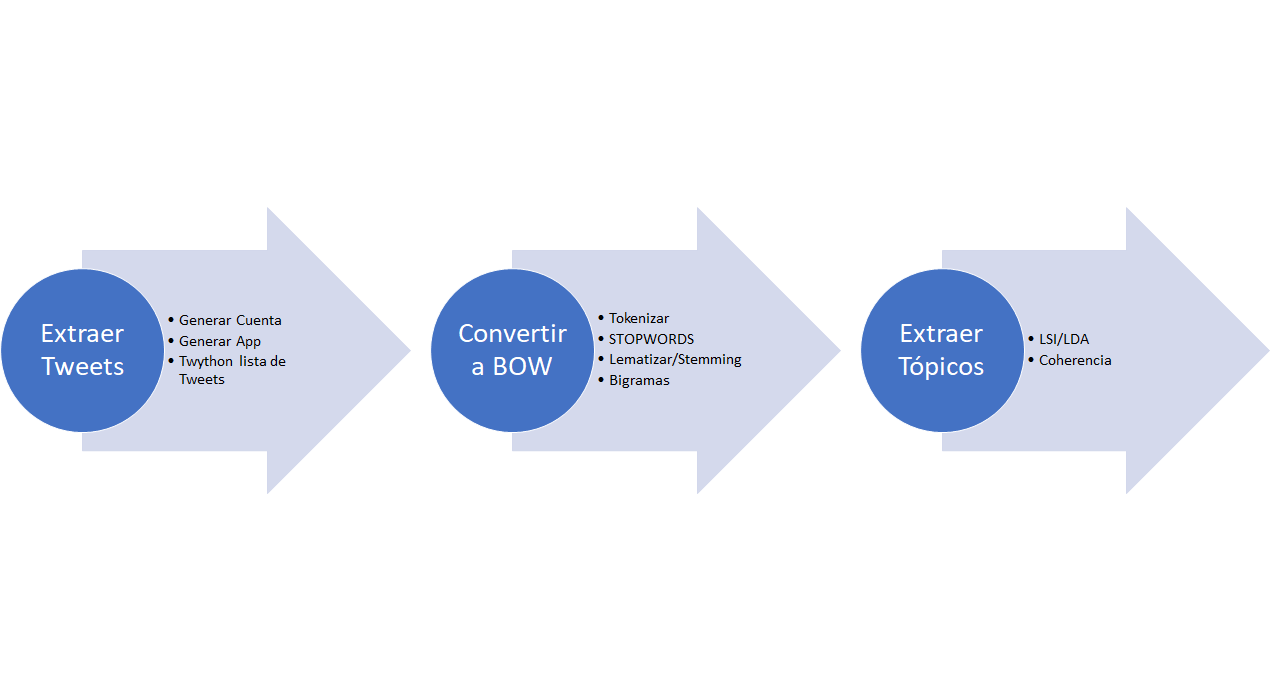

### Paso 1: Dar de alta app en twitter

Nota: Se necesita usuario twitter

[Twitter Apps](https://developer.twitter.com/en/apps)


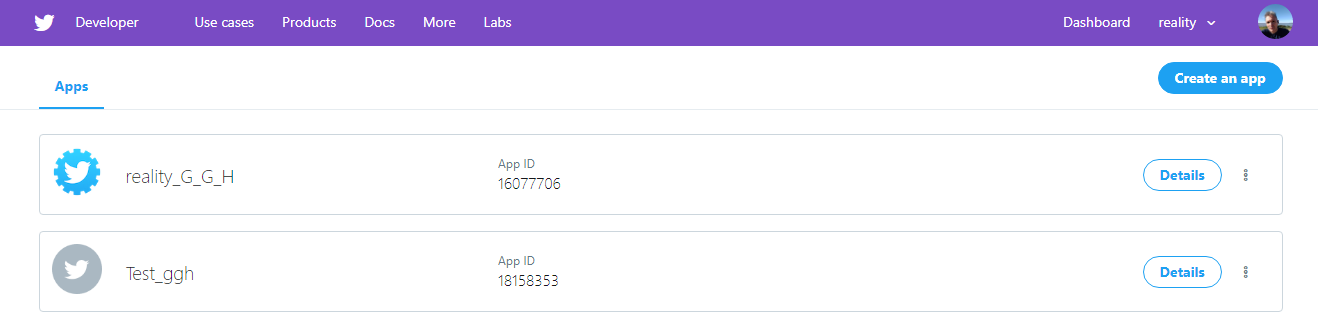

Nota: Poner opción student y una url de website válido (sino usar https://guillermo-henrion.webnode.com/)

Poner en texto de uso por ejemplo: "I am interested in conducting a study analyzing how information flows among the participating individuals, under what conditions they expand and under which they stagnate. If we look at this dynamic and recognize it as a complex adaptive system, where information flows. This analysis aims to respond to how we consume and influence the information since someone publishes it until we see it and replicate it."

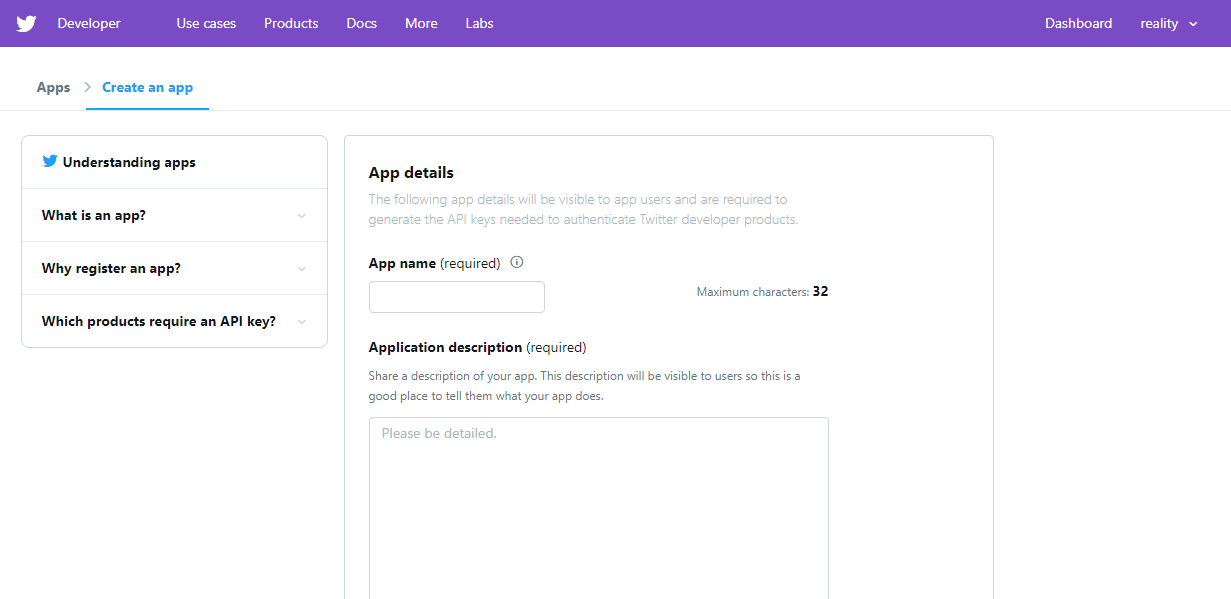

Genrar API key y Acccess token

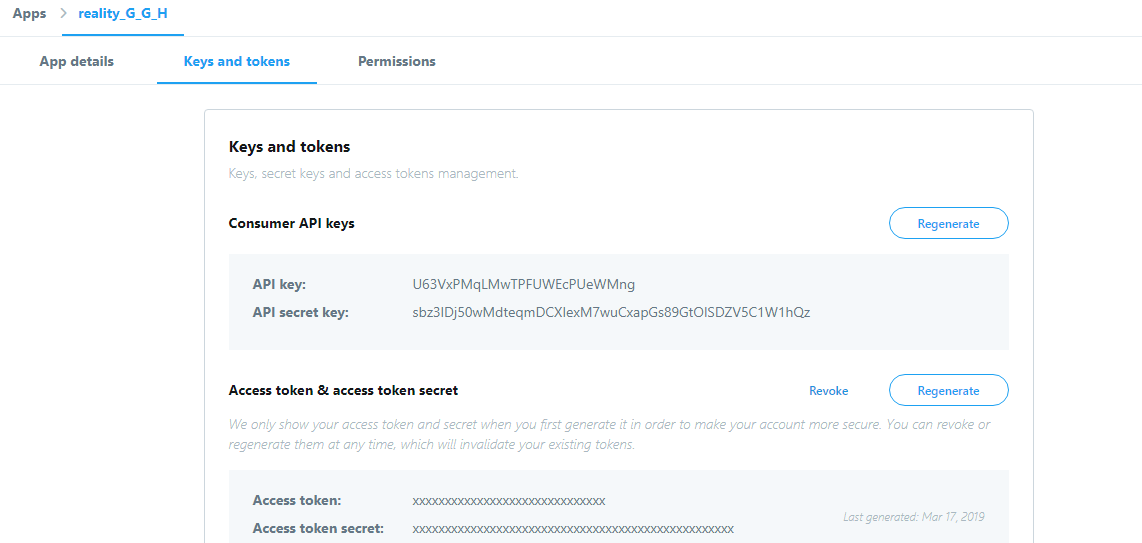

###Paso 2: Instalar las librerías y componentes, e importar librerías

Nota: Se necesita reiniciar en entorno de ejecución luego de la instalación 

In [1]:
!pip install twython
!pip install ftfy
!pip install pyLDAvis==2.1.2
!python -m spacy download es_core_news_sm
!python -m spacy download fr_core_news_sm
import nltk
nltk.download('stopwords')
!pip install feedparser
!pip install gspan

!pip install matplotlib==2.2.3
!pip install networkx==2.5

     |████████████████████████████████| 16.2 MB 9.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
     |████████████████████████████████| 14.7 MB 8.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from twython import Twython
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import ftfy
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import os
from gensim.models.wrappers import LdaMallet, ldamallet
from gensim.corpora import Dictionary
import spacy
#import pyLDAvis.gensim
import csv
from unicodedata import normalize
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
#import gspan

#!pip install --upgrade beautifulsoup4
#!pip install --upgrade html5lib
#!pip install --upgrade html5lib==1.0b8

###Paso 3: Conectar a la app Twitter

In [3]:
SEED = 8888

from spacy.lang.en.stop_words import STOP_WORDS

twitter = Twython("yAW9ZsqBE8wnrLJrdF1vZQTbw", "7svu7ZucrMnz5khH2nOYmxsbLMvf56O5sLoI80Z7CtWhcDLlII", "280807268-A4lN5sK6Wu1aWsoO9rFVSLciX5mrwhVt11cvhjoh", "1C79SO4fzxUgGGgsVNV11Wx9ebiau75OTd7PhuMi0jUpn")

# API key, APIsecret key, Access token, Access token secret

twitter.sleep_on_rate_limit = True


###Paso 5: Traer tweets a analizar 

# Análisis de redes

In [70]:
import matplotlib.pyplot as plt
from networkx import nx

g2=nx.Graph()

tweets = twitter.cursor(twitter.search, q='#CFK', sleep_on_rate_limit = True)

i=0
for tweet in tweets:
  user1=tweet['user']['screen_name']
  i=i+1
  if i>400:
    break
  if not g.has_node(user1):
    n1=g2.add_node(user1)
  if 'retweeted_status' in tweet:
    userR=tweet['retweeted_status']['user']['screen_name']
    if not g2.has_node(userR):
      n1=g2.add_node(userR)
    g2.add_edge(userR, user1)



In [99]:
g=nx.Graph()

tweets = twitter.cursor(twitter.search, q='#MauricioMacri', sleep_on_rate_limit = True)

i=0
for tweet in tweets:
  user1=tweet['user']['screen_name']
  i=i+1
  if i>400:
    break
  if not g.has_node(user1):
    n1=g.add_node(user1)
  if 'retweeted_status' in tweet:
    userR=tweet['retweeted_status']['user']['screen_name']
    if not g.has_node(userR):
      n1=g.add_node(userR)
    g.add_edge(userR, user1)

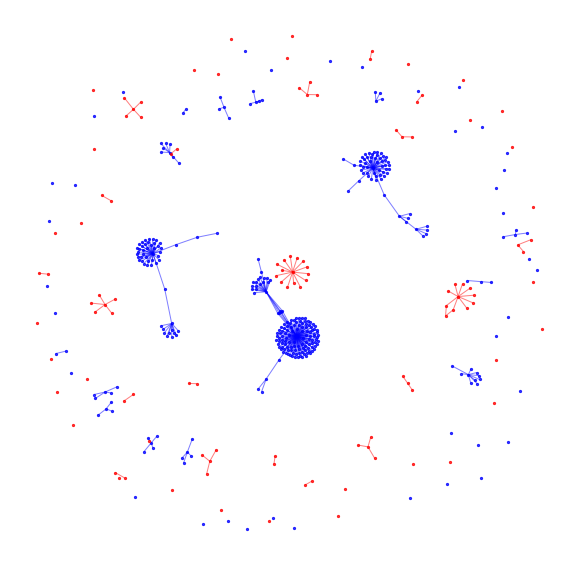

In [101]:
#nx.draw(g,alpha=0.5, node_size=1, edge_color='blue', font_size=10)
#nx.draw(g2,alpha=0.5, node_size=1, edge_color='blue', font_size=10)
plt.figure(1,figsize=(10,10)) 
plt.axis('off')
pos=nx.spring_layout(g2)
nx.draw_networkx_nodes(g2,node_color='b',alpha=0.8, pos=pos, node_size=5)
nx.draw_networkx_edges(g2,pos,alpha=0.5, edge_color='b', width=1, label=g.nodes.items(), connectionstyle="arc3,rad=0.2")
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g,node_color='r',alpha=0.8, pos=pos, node_size=5)
nx.draw_networkx_edges(g,pos,alpha=0.5, edge_color='r', width=1, label=g.nodes.items(), connectionstyle="arc3,rad=0.2")

plt.show()


In [14]:
import plotly.graph_objects as go
G = nx.random_geometric_graph(200, 0.125)

In [15]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [16]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [17]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()